In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [48]:
import tensorflow as ts
from tensorflow import keras
from tensorflow.keras import layers,datasets
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [49]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [50]:
y_train[0][0]

6

In [51]:
c='Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck'
c=c.split(",")
c

['Airplane',
 ' Automobile',
 ' Bird',
 ' Cat',
 ' Deer',
 ' Dog',
 ' Frog',
 ' Horse',
 ' Ship',
 ' Truck']

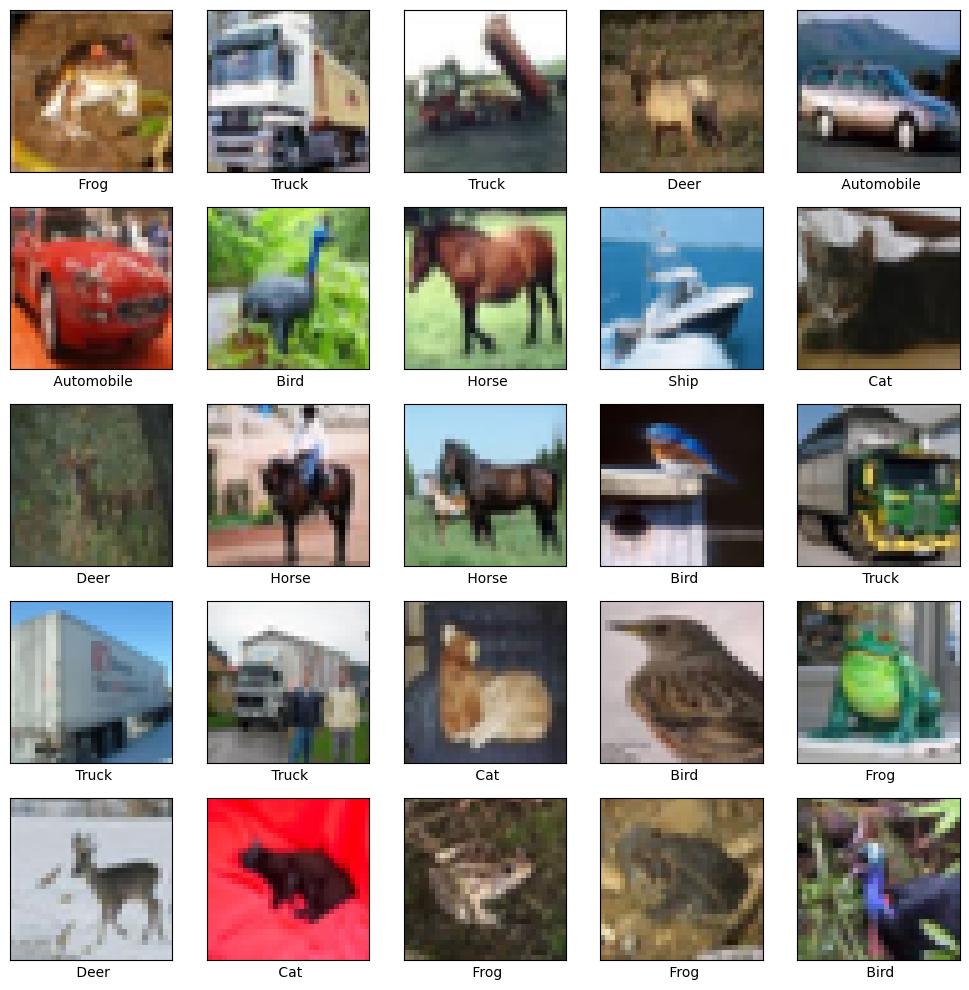

In [52]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    plt.xlabel(c[y_train[i][0]])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

In [53]:
#normalization
x_train=x_train/255.0
x_test=x_test/255.0


In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img=ImageDataGenerator(rotation_range=0.9, width_shift_range=0.2, height_shift_range=0.2,horizontal_flip=True)
training=img.flow(x_train,y_train,batch_size=32)


In [55]:
from tensorflow.keras import models
dir(models)

['Model',
 'Sequential',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'clone_model',
 'load_model',
 'model_from_json',
 'save_model']

In [56]:
cnn=models.Sequential([
    layers.Conv2D(filters=16,input_shape=(32,32,3),activation='relu',kernel_size=(3,3),padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,activation='relu',kernel_size=(3,3),padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=128,activation='relu',kernel_size=(3,3),padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(32,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [57]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,186 (446.04 KB)

 Trainable params: 114,186 (446.04 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
from tensorflow.keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='loss',patience=3)

In [59]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [60]:
history=cnn.fit(training,callbacks=[es],epochs=14)

Epoch 1/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.2822 - loss: 1.9174
Epoch 2/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.4889 - loss: 1.4104
Epoch 3/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.5458 - loss: 1.2486
Epoch 4/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5927 - loss: 1.1378
Epoch 5/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6222 - loss: 1.0617
Epoch 6/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6445 - loss: 1.0023
Epoch 7/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.6577 - loss: 0.9686
Epoch 8/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.6767 - loss: 0.9177
Epoch 9/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.6864 - loss: 0.8934
Epoch 10/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6894 - loss: 0.8777
Epoch 11/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.6998 - loss: 0.8480
Epoch 12

In [70]:
history.params

{'verbose': 'auto', 'epochs': 14, 'steps': 1563}

In [61]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7323 - loss: 0.8076


[0.8136400580406189, 0.7294999957084656]

In [73]:

train_acc = history.history['accuracy']          # Training accuracy per epoch
      # Validation accuracy per epoch
train_loss = history.history['loss']             # Training loss per epoch



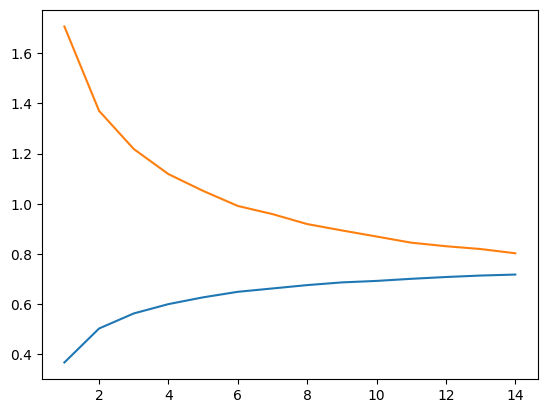

In [76]:
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs,train_acc)
plt.plot(epochs,train_loss)